# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files

drive.mount('/content/drive') 
data_dir = '/content/drive/My Drive/영빈/data/'

df = pd.read_feather(data_dir + 'clustering_data_1901_2004_ver{0}.ftr'.format(1))
df

Mounted at /content/drive


,년,월,가맹점소재지1,가맹점소재지2,성별,연령대별,연평균소득추정,가정용품,개인미용,개인운송,교육서비스,기타,대형판매,보건,보험,숙박서비스,식료품,여객운송,오락_문화,음식점,의류_잡화,전자상거래,정보통신,종합소매,주거,합계%
0,2019,1,강원도,강릉시,남성,20대,B1,0.000000,0.016968,0.026919,0.0,0.002995,0.070005,0.006491,0.000000,0.037965,0.025353,0.000000,0.042588,0.546769,0.009083,0.0,0.000000,0.211340,0.003523,1.0
1,2019,1,강원도,강릉시,남성,20대,B2,0.001245,0.018671,0.050827,0.0,0.006558,0.006698,0.048198,0.000000,0.031228,0.037825,0.000123,0.055453,0.455255,0.030573,0.0,0.000284,0.250780,0.006281,1.0
2,2019,1,강원도,강릉시,남성,20대,B3,0.006838,0.017268,0.076535,0.0,0.003972,0.057428,0.014446,0.000000,0.024132,0.040246,0.003582,0.049992,0.490051,0.018139,0.0,0.000169,0.190898,0.006304,1.0
3,2019,1,강원도,강릉시,남성,20대,B4,0.000217,0.012398,0.085893,0.0,0.006220,0.063568,0.019497,0.000000,0.031590,0.038827,0.002346,0.034838,0.511056,0.012651,0.0,0.000000,0.177576,0.003322,1.0
4,2019,1,강원도,강릉시,남성,20대,B5,0.000000,0.003997,0.012757,0.0,0.003057,0.088494,0.002322,0.000000,0.039834,0.029542,0.000000,0.034749,0.583757,0.015002,0.0,0.000000,0.183910,0.002580,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337029,2020,4,충청북도,충주시,여성,60대 이상,B3,0.029227,0.022472,0.110701,0.0,0.005983,0.084747,0.183780,0.000000,0.003846,0.065866,0.000000,0.080076,0.120656,0.033512,0.0,0.000408,0.243995,0.014730,1.0
337030,2020,4,충청북도,충주시,여성,60대 이상,B4,0.016502,0.022778,0.102699,0.0,0.019791,0.062486,0.162471,0.001317,0.003284,0.063448,0.000000,0.148258,0.136114,0.023608,0.0,0.000167,0.226666,0.010410,1.0
337031,2020,4,충청북도,충주시,여성,60대 이상,B5,0.000000,0.000000,0.063387,0.0,0.000000,0.120413,0.050646,0.000000,0.000000,0.019304,0.000000,0.246296,0.184772,0.049689,0.0,0.000000,0.264008,0.001485,1.0
337032,2020,4,충청북도,충주시,여성,60대 이상,B6,0.000000,0.000000,0.000000,0.0,0.000000,0.201937,0.059451,0.000000,0.000000,0.000000,0.000000,0.453200,0.224740,0.000000,0.0,0.000000,0.060672,0.000000,1.0


# UMAP for clustering

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
!pip install umap-learn
import umap
!pip install hdbscan
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 17.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=f987ff3e1a531133f6508deeb29003668bf46d7bdf42bc58ca2205b22bd99896
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=18381d4010b41a2836c3918c3747ee6ce08c05bda5b5d4be423d5a791aaf0e09
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311915 sha256=b1d79d5eb180625fa8f5352f60f1

In [ ]:
features = df.iloc[:,7:25] 

standard_embedding = umap.UMAP(
    n_neighbors=10000,
    min_dist=1.0,
    n_components=2,
    random_state=42,
).fit_transform(features)


plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.1, cmap='Spectral');

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(features)

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');


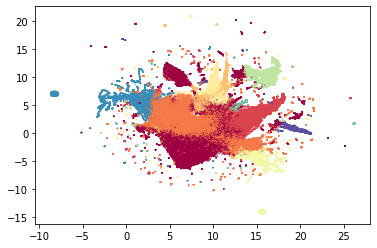

In [ ]:
# default

kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(features)

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');


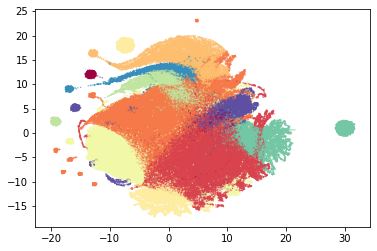

In [17]:
# min dist = 1.0

kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(features)

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
